# Принятие решений в бизнесе на основании А/В теста

# Контекст
Я аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

# Описание исследования
В первой части проекта нам предстоит приоритизация гипотез по двум формулам(с учетом влияния на пользователей и без), а во второй будем анализировать А/В тест и делать выводы на основе анализа.

# Цель исследования
Провести приоритизацию гипотез для определения первостепенных задач, анализ А/В теста для определения стратегии взаимодействия с клиентами.

# Задачи исследования
Часть 1. Задачи:

Применить фреймворк ICE для приоритизации гипотез. 

Отсортировать их по убыванию приоритета.

Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Задачи: Проанализировать A/B-тест:

Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.

Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.

Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

Построить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

Построить точечный график стоимостей заказов. Сделать выводы и предположения.

Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.

Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.

Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.

# Часть 1. Приоритизация гипотез.
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:

Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Предобработка данных

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 150
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Поменяем названия столбцов, чтобы они соответствовали хорошему стилю.

In [2]:
data.columns = data.columns.str.lower()
display(data)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Расчет ICE и 


Посчитаем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовём ICE. Выведем столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'.

In [3]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts'] 
pd.set_option('display.float_format', '{:.2f}'.format)
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По формуле ICE топ 3 приоритетные гипотезы: 

1.Запустить акцию, дающую скидку. 

2.Добавить два новых канала привлечения трафика. 

3.Добавить форму подписки на все основные страницы.

Теперь проделаем все то же самое, но по формуле RICE:

In [4]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


По формуле RICE топ 3 приоритетные гипотезы: 

1.Добавить форму подписки на все основные страницы. 

2.Добавить блоки рекомендаций товаров на сайт. 

3.Добавить два новых канала привлечения трафика.

### Выводы приоритизации гипотез
Проведя расчеты по формуле ICE мы нашли приоритетные гипотезы: 

1.Запустить акцию, дающую скидку. 

2.Добавить два новых канала привлечения трафика. 

3.Добавить форму подписки на все основные страницы.

Перещитав по формуле RICE приоритетными оказались: 

1.Добавить форму подписки на все основные страницы. 

2.Добавить блоки рекомендаций товаров на сайт. 

3.Добавить два новых канала привлечения трафика.

Такие разные результаты получились из-за того, что по формуле RICE в расчет входит показатель Reach — скольких пользователей затронет изменение, поэтому если мы хотим учитывать влияние на пользователей, то стоит смотреть на результат расчетов RICE, а если не хотим, то смотрим на расчет ICE.

## Часть 2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

Посмотрим на данные.

In [5]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

display(orders, visitors)
orders.info()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные выглядят хорошо, пропусков нет, нужно только поменя тип данных у дат и можно приступать к анализу.

In [6]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам и сделаем по нему первые выводы и предположения.

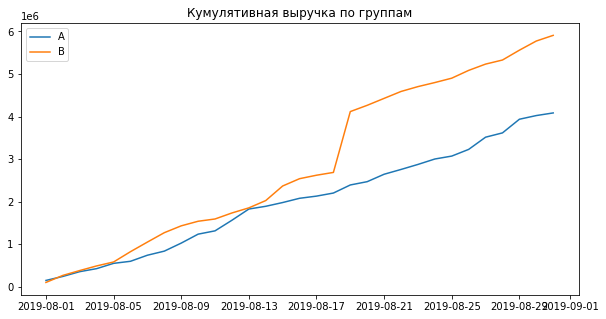

In [7]:
#создадим датафрейм datesGroups с уникальными 
#парами значений 'date' и 'group', таблицы orders и убираем дубликаты 
datesGroups = orders[['date', 'group']].drop_duplicates()

# oбъявим переменную ordersAggregated, содержащую: дату; группу A/B-теста;
# число уникальных заказов в группе теста по указанную дату включительно;
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# суммарную выручку заказов в группе теста по указанную дату включительно.
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group']) #сортировка по столбцам 'date', 'group'

# объявим переменную visitorsAggregated, содержащую: дату; группу A/B-теста;
# количество уникальных посетителей в группе теста по указанную дату включительно.
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
 ).sort_values(by=['date', 'group']) #сортировка по столбцам 'date', 'group'


# определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам
# 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

#присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(10,5))
plt.title("Кумулятивная выручка по группам")
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 

Выручка почти равномерно увеличивается в течение всего теста и это хороший знак. Однако график выручки группы В резко растет в одной точке. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем дальше.

### График среднего чека по группам
Построим график среднего чека по группам и сделаем по нему выводы и предположения.

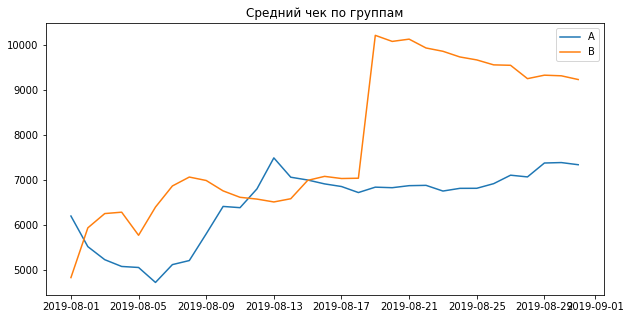

In [8]:
plt.figure(figsize=(10,5))
plt.title("Средний чек по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

Значение среднего чека по группам продолжает колебаться. Принимать решение по этой метрике рано, требуется дополнительный анализ выбросов, которые так сильно искажают результаты после 17 августа 2019 года.

### График относительного изменения кумулятивного среднего чека
Построим график относительного изменения кумулятивного среднего чека группы B к группе A и сделаем выводы и предположения.

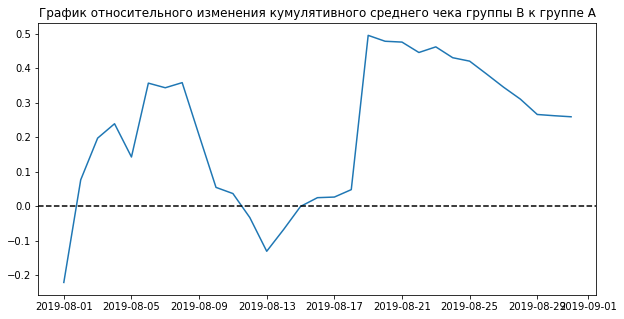

In [9]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.title("График относительного изменения кумулятивного среднего чека группы В к группе А")
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

### График кумулятивной конверсии по группам
Построим график кумулятивной конверсии по группам, и так же сделаем выводы и предположения.

(18109.0, 18140.0, 0.0, 0.05)

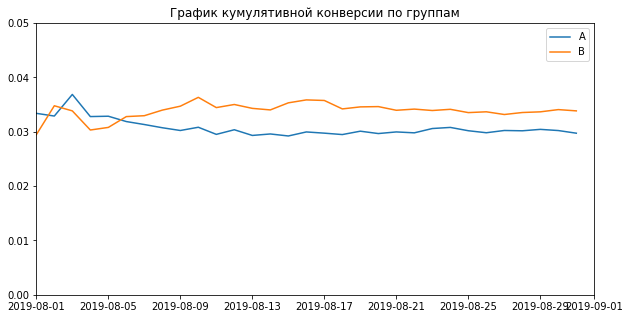

In [10]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.title("График кумулятивной конверсии по группам")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
#plt.axis(["2019-08-01", '2019-09-03', 0, 0.015])

В начале теста группа A имела большую конверсию, но постепенно группа B выровнялась и зафиксировалась примерно около одного значения, больше значения группы A. Колебания конверсии были незначительны - в пределах 1%. Конверсия группы В около 3,5%, а группы А около 3%.

### График относительного различия кумулятивных конверсий
Построим график относительного различия кумулятивных конверсий:

(18109.0, 18140.0, -0.5, 0.5)

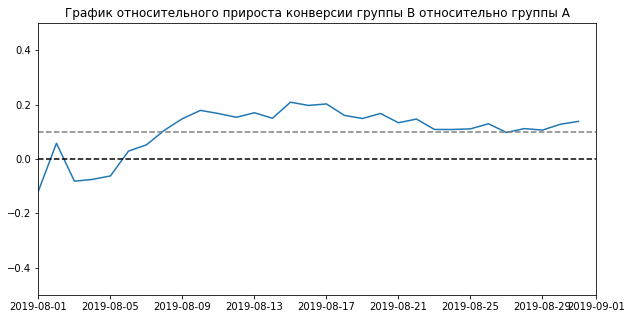

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.title("График относительного прироста конверсии группы B относительно группы A")
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Со второй недели теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 10-15% относительно группы A. В целом отношение конверсии уже установилось и можно делать какие-то выводы о тесте. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям
Построим точечный график количества заказов по пользователям.

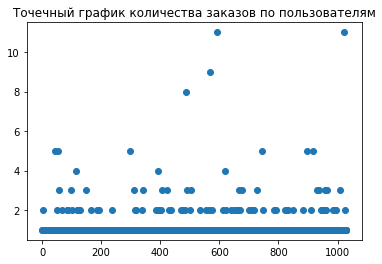

In [12]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title("Tочечный график количества заказов по пользователям")
plt.scatter(x_values, ordersByUsers['orders']) 

Пользователей, заказавших более двух раз очень мало. Они вполне могут быть аномальными. А вот 2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

### Перцентили количества заказов на пользователя
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [13]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов
Оценим стоимость заказов на точечном графике:

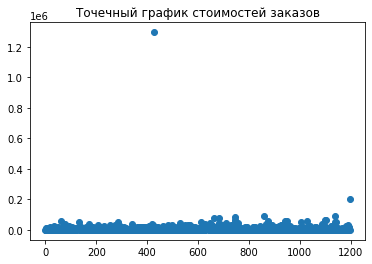

In [14]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title("Точечный график стоимостей заказов")
plt.scatter(x_values, orders['revenue']) 

Заказов стоимостью свыше 150 000 рублей всего два. Есть выброс в районе 1 250 000 рублей и в районе 200 000 рублей. Посмотрим на выборочные перцентили.

### Перцентили стоимости заказов
Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

In [15]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Только 5% процентов пользователей совершали покупку на стоимость свыше 28 000 рублей. а у одного процента покупателей чек больше 58 000 рублей(тот самый милионный заказ). Перейдем к статистической значимости.

## Статистическая значимость различий в конверсии между группами по «сырым» данным
Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным и сделаем выводы и предположения. Будем делать двусторонний тест. Сформулируем гипотезы так: H0: Конверсии в группах А и В равны Н1: Конверсии в группах А и В отличаются.

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
z=0.138
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)
 
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)
 
print('P-value =', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
 
#print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 
print('Относительный прирост конверсии =',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum())+z))



P-value = 0.01679
Относительный прирост конверсии = 0.138


6.074289317640913e-05

P-value сильно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

### Статистическая значимость различий в среднем чеке между группами по «сырым» данным
Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным и сделаем выводы и предположения. Будем делать двусторонний тест. Сформулируем гипотезы так: H0: Средние чеки в группах А и В равны Н1: Средние чеки в группах А и В отличаются.

In [36]:
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('Относительное различие среднего чека =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.729
Относительное различие среднего чека = 0.259


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Но относительное различие среднего чека между сегментами 25.9%. Это значит, что средний чек группы B значительно выше среднего чека группы A. Приступим к очистке данных.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Сначала очистим данные: нижняя граница по количеству заказов равна 2, а по стоимости заказа 28000(округлим до 30000)

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

А теперь посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным и сделаем выводы и предположения. Будем делать двусторонний тест. Сформулируем гипотезы так: H0: Конверсии в группах А и В равны Н1: Конверсии в группах А и В отличаются.

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('Относительный прирост конверсии =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value = 0.01334
Относительный прирост конверсии = 0.172


P-value сильно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 17.2%. Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

### Статистическая значимость различий в среднем чеке между группами по «очищенным» данным
Посчитаем статистическую значимость различий в среднем чеке между группами по «очищенным» данным и сделаем выводы и предположения. Будем делать двусторонний тест. Сформулируем гипотезы так: H0: Средние чеки в группах А и В равны Н1: Средние чеки в группах А и В отличаются.

In [39]:
print('P-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print('Относительное различие среднего чека =',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.720
Относительное различие среднего чека = -0.023


P-value немного уменьшился, но и разница между сегментами сократилась с 26% до 2%. Средние чеки выравнялись, статистически значимых отличий в среднем чеке между группами нет.

## Выводы по тесту
Какие выводы по тесту можем сделать? 

Имеющиеся факты:

Есть статистически значимое различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия конверсии между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к улучшению;

График различия среднего чека говорит о том, что результаты группы B улучшились за один день и за один заказ и сейчас на 30% лучше, но по нему какие-то выводы делать не стоит, там есть аномалия.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать тест смысла нет:
группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата. Следует перейти к проверке следующей гипотезы.

## Общий вывод

In [40]:
orders.sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
56,900025958,5114589,2019-08-16,570,B
573,1887336629,6958315,2019-08-04,1490,B
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
233,797272237,11685486,2019-08-23,6201,A
...,...,...,...,...,...
682,1216533772,4266935830,2019-08-29,78990,B
886,51443164,4278982564,2019-08-05,24744,A
576,2724331495,4279090005,2019-08-04,6716,B
392,3796325351,4281247801,2019-08-25,2640,B


Обращаю внимание, что в данных в разные группы попали одни и те же пользователи(например, 8300375). Вообще такое не должно происходить, но вот такие вот в этом проекте данные. 

Мы провели большую работу: Сделали приритизацию гипотез, посчитали приоритеты по формулам ICE и RICE, объяснили в чем разница между ними. Потом перешли к анализу А/В теста. Посмотрели и немного поправили данные, построили графики: кумулятивной выручки по группам, среднего чека по группам, относительного изменения кумулятивного среднего чека, кумулятивной конверсии по группам, относительного различия кумулятивных конверсий. Так же были пстроены точечные графики количества заказов по пользователям и стоимостей заказов и посчитаны перцентили для обоих показателей. Еще были посчитаны статистические значимости различий в среднем чеке и конверсии между группами по «очищенным» и «сырым» данным. И пришли к таким выводам, что тест следует остановить и признать его успешным. Продолжать тест смысла нет: группа B статистически значимо лучше группы A по конверсии, а график конверсии говорит о фиксации результата. Следует перейти к проверке следующей гипотезы.